In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Heatmap plot of NA12878 ground truth CNVs compared to those determined by the reference studies

In [2]:
#load the dataset
total = pd.read_csv("benchmark_refseq.txt", sep='\t', usecols=list('ABCDEF'))
exome = pd.read_csv("benchmark_refseq.txt", sep='\t', usecols=list('GHIJKL'))
indet = pd.read_csv("benchmark_refseq.txt", sep='\t', usecols=list('MN'))

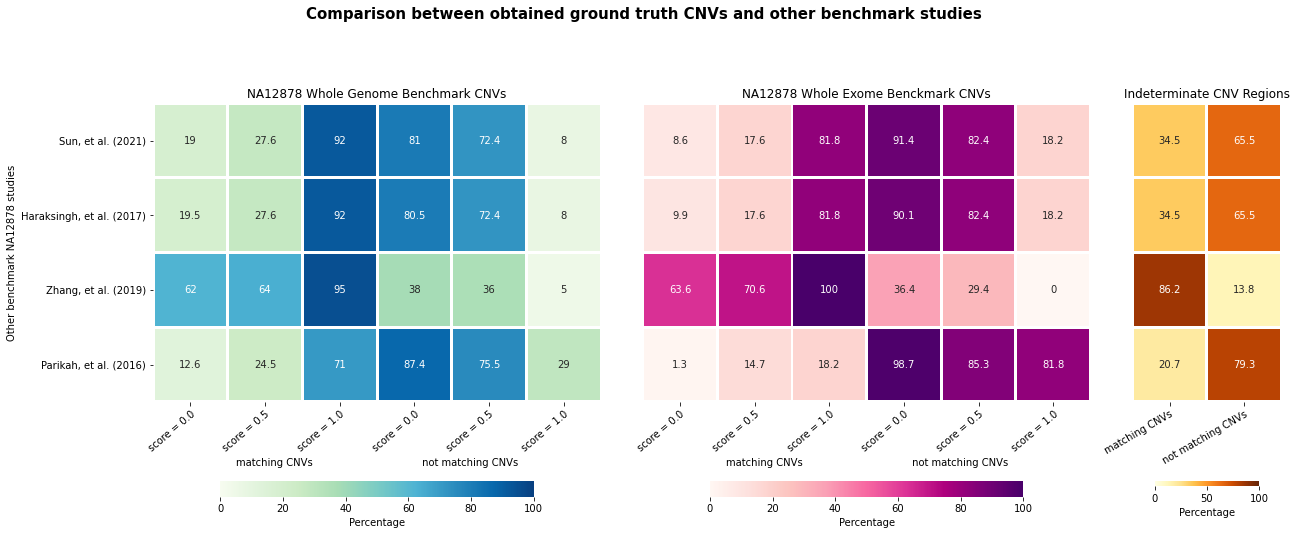

In [5]:
# plot heatmap
fig, (ax,ax2,ax3) = plt.subplots(1, 3, figsize = (18, 8), gridspec_kw={'width_ratios': [6, 6, 2]})
fig.subplots_adjust(wspace=0.01)

yticklabels = ["Sun, et al. (2021)", "Haraksingh, et al. (2017)", "Zhang, et al. (2019)", "Parikah, et al. (2016)"]
xticklabels = ["score = 0.0", "score = 0.5", "score = 1.0", "score = 0.0", "score = 0.5", "score = 1.0"]

total_heatmap = sns.heatmap(total,
                            annot=True, 
                            fmt='.3g',
                            vmin=0.0, vmax=100.0,
                            linewidths=2, linecolor='white',
                            xticklabels=xticklabels, 
                            yticklabels=yticklabels,
                            cmap="GnBu",
                            cbar_kws={'label': 'Percentage', "shrink": .70, 'orientation':'horizontal'},
                            ax=ax,
                            square=True)

total_heatmap.set_yticklabels(total_heatmap.get_yticklabels(), rotation=0)
total_heatmap.set_xticklabels(total_heatmap.get_xticklabels(), rotation=40, ha="right", rotation_mode="anchor")
total_heatmap.set_title("NA12878 Whole Genome Benchmark CNVs")
total_heatmap.set_ylabel("Other benchmark NA12878 studies")
total_heatmap.set_xlabel('''matching CNVs                                   not matching CNVs''')
 
exon_heatmap = sns.heatmap(exome,
                            annot=True, 
                            fmt='.3g',
                            vmin=0.0, vmax=100.0,
                            linewidths=2, linecolor='white',
                            xticklabels=xticklabels, 
                            yticklabels=False,
                            cmap="RdPu",
                            cbar_kws={'label': 'Percentage', "shrink": .70, 'orientation':'horizontal'},
                            ax=ax2,
                            square=True)

exon_heatmap.set_xticklabels(exon_heatmap.get_xticklabels(), rotation=40, ha="right", rotation_mode="anchor")
exon_heatmap.set_title("NA12878 Whole Exome Benckmark CNVs")
exon_heatmap.set_xlabel('''matching CNVs                                   not matching CNVs''')

a=["matching CNVs","not matching CNVs"]
indet_heatmap = sns.heatmap(indet,
                            annot=True, 
                            fmt='.3g',
                            vmin=0.0, vmax=100.0,
                            linewidths=2, linecolor='white',
                            xticklabels=a, 
                            yticklabels=False,
                            cmap="YlOrBr",
                            cbar_kws={'label': 'Percentage', "shrink": .70, 'orientation':'horizontal'},
                            ax=ax3,
                            square=True)

indet_heatmap.set_title("Indeterminate CNV Regions")
indet_heatmap.set_xticklabels(indet_heatmap.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")


plt.suptitle("Comparison between obtained ground truth CNVs and other benchmark studies", fontweight ="bold",
            fontsize=15)

fig.tight_layout()
plt.savefig("comparison_benchmark.jpg")
plt.show()


### Heatmap plot of NA12878 ground truth CNVs with problematic regions

In [7]:
#load the dataset
tot = pd.read_csv("probreg_refseq.txt", sep='\t', usecols=list('ABC'))
exo = pd.read_csv("probreg_refseq.txt", sep='\t', usecols=list('GHI'))
ind = pd.read_csv("probreg_refseq.txt", sep='\t', usecols=list('M'))

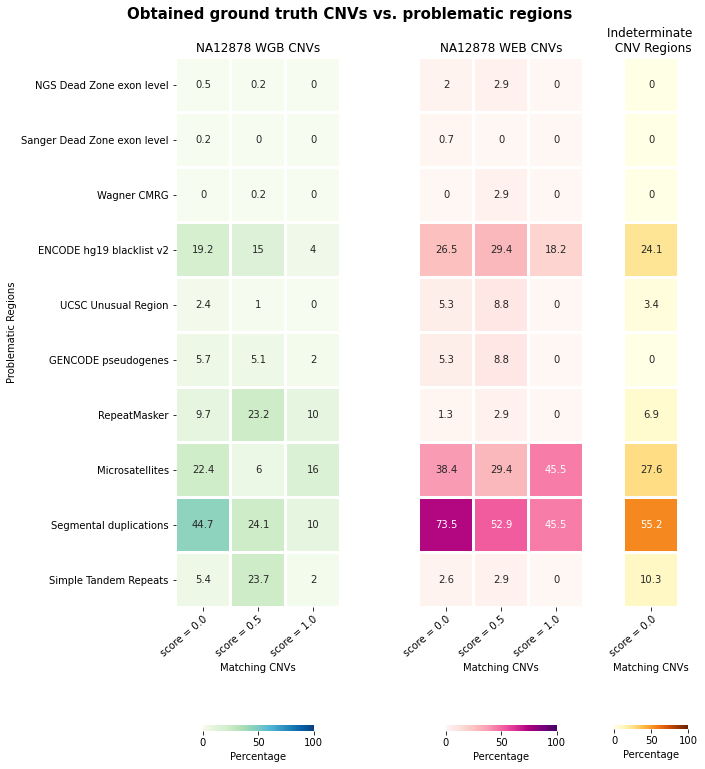

In [9]:
# plot heatmap
fig, (ax,ax2,ax3) = plt.subplots(1, 3, figsize = (10, 12), gridspec_kw={'width_ratios': [6, 6, 2]})
fig.subplots_adjust(wspace=0.01)

yticklabels = ["NGS Dead Zone exon level", "Sanger Dead Zone exon level", "Wagner CMRG", 
               "ENCODE hg19 blacklist v2", "UCSC Unusual Region", "GENCODE pseudogenes",
              "RepeatMasker", "Microsatellites", "Segmental duplications", "Simple Tandem Repeats"]
xticklabels = ["score = 0.0", "score = 0.5", "score = 1.0"]

tot_heatmap = sns.heatmap(tot,
                          annot=True, 
                          fmt='.3g',
                          vmin=0.0, vmax=100.0,
                          linewidths=2, linecolor='white',
                          xticklabels=xticklabels,
                          yticklabels=yticklabels,
                          cmap="GnBu",
                          cbar_kws={'label': 'Percentage', "shrink": .4, 'orientation':'horizontal'},
                          ax=ax,
                          square=True)

tot_heatmap.set_yticklabels(tot_heatmap.get_yticklabels(), rotation=0)
tot_heatmap.set_xticklabels(tot_heatmap.get_xticklabels(), rotation=40, ha="right", rotation_mode="anchor")
tot_heatmap.set_title("NA12878 WGB CNVs")
tot_heatmap.set_ylabel("Problematic Regions")
tot_heatmap.set_xlabel('''Matching CNVs''')

exo_heatmap = sns.heatmap(exo,
                          annot=True,
                          fmt='.3g',
                          vmin=0.0, vmax=100.0,
                          linewidths=2, linecolor='white',
                          xticklabels=xticklabels,
                          yticklabels=False,
                          cmap="RdPu",
                          cbar_kws={'label': 'Percentage', "shrink": .4, 'orientation':'horizontal'},
                          ax=ax2,
                          square=True)

exo_heatmap.set_xticklabels(exo_heatmap.get_xticklabels(), rotation=40, ha="right", rotation_mode="anchor")
exo_heatmap.set_title('''NA12878 WEB CNVs''')
exo_heatmap.set_xlabel('''Matching CNVs''')

a=["score = 0.0"]
ind_heatmap = sns.heatmap(ind,
                          annot=True,
                          fmt='.3g',
                          vmin=0.0, vmax=100.0,
                          linewidths=2, linecolor='white',
                          xticklabels=a, 
                          yticklabels=False,
                          cmap="YlOrBr",
                          cbar_kws={'label': 'Percentage', "shrink": .8, 'orientation':'horizontal'},
                          ax=ax3,
                          square=True)

ind_heatmap.set_title("Indeterminate \n CNV Regions")
ind_heatmap.set_xticklabels(ind_heatmap.get_xticklabels(), rotation=40, ha="right", rotation_mode="anchor")
ind_heatmap.set_xlabel('''Matching CNVs''')
                       
plt.suptitle("Obtained ground truth CNVs vs. problematic regions", fontweight ="bold",
            fontsize=15)

fig.tight_layout()
plt.savefig("comparison_problematic_regions.jpg")
plt.show()

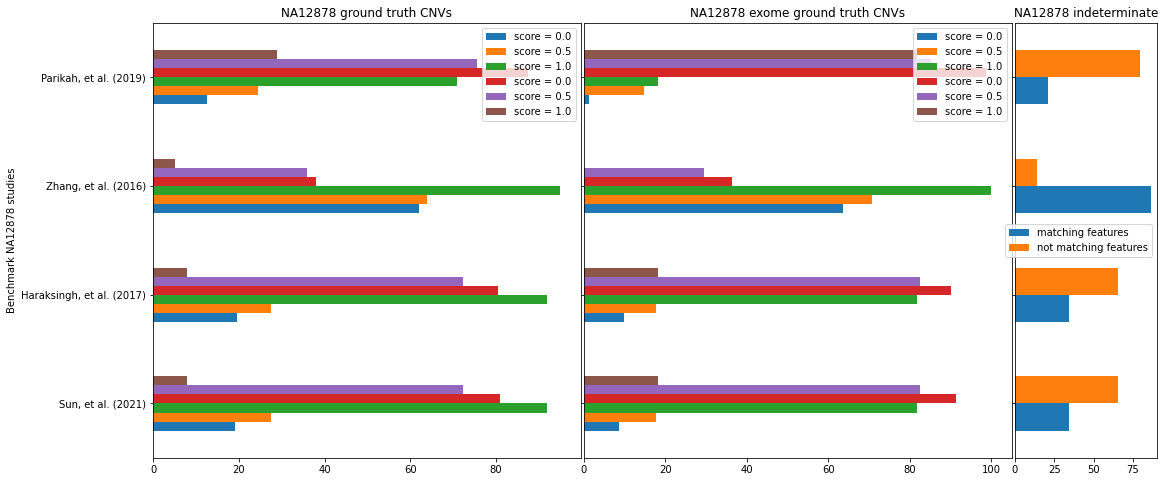

In [57]:
fig, (ax,ax2,ax3) = plt.subplots(1, 3, figsize = (18, 8), gridspec_kw={'width_ratios': [6, 6, 2]})
fig.subplots_adjust(wspace=0.01)

yticklabels = ["Sun, et al. (2021)", "Haraksingh, et al. (2017)", "Zhang, et al. (2016)", "Parikah, et al. (2019)"]
xticklabels = ["score = 0.0", "score = 0.5", "score = 1.0", "score = 0.0", "score = 0.5", "score = 1.0"]

total_barplot = total.plot(kind = 'barh', ax=ax)
total_barplot.set_yticklabels(yticklabels)
total_barplot.set_title("NA12878 ground truth CNVs")
total_barplot.set_ylabel("Benchmark NA12878 studies")
total_barplot.legend(xticklabels)

exome_barplot = exome.plot(kind = 'barh', ax=ax2)
exome_barplot.set_title("NA12878 exome ground truth CNVs")
exome_barplot.set_yticklabels([])
exome_barplot.legend(xticklabels)

indet_barplot = indet.plot(kind = 'barh', ax=ax3)
indet_barplot.set_title("NA12878 indeterminate")
indet_barplot.set_yticklabels([])
a=["matching features","not matching features"]
indet_barplot.legend(a, loc=0)
